# Opioids in Tennessee
**An Exploration of the Washington Post Opioid Dataset for Tennessee**

**Contact**
* [Qiusheng Wu](https://wetlands.io)
* [Michael Camponovo](https://geography.utk.edu/about-us/faculty/michael-camponovo/)

## Data
* [Tennessee Population by County (2019)](http://worldpopulationreview.com/us-counties/tn/)
* [Tennessee Opioid Data (2006-2012)](https://www.washingtonpost.com/wp-stat/dea-pain-pill-database/summary/arcos-tn-statewide-itemized.tsv.gz) (zip file: 139 MB; uncompressed: 2.4 GB; 5.75 million rows)


## Useful Links

* [StoryMaps of Opioids in Tennessee by Michael Camponovo](https://storymaps.arcgis.com/stories/92678e77f9f9467bbad17c06f68ac67b)
* [Pandas Basics (Reading Data Files, DataFrames, Data Selection](https://data36.com/pandas-tutorial-1-basics-reading-data-files-dataframes-data-selection/)
* [Pandas Tutorial 2: Aggregation and Grouping](https://data36.com/pandas-tutorial-2-aggregation-and-grouping/)
* [ipyleaflet: Interactive maps in the Jupyter notebook](https://ipyleaflet.readthedocs.io/en/latest/index.html)
* https://spatial.utk.edu/maps/opioids-tn.html

## Table of Content
* [Loading Opioid Data](#loading-opioid-data)
* [Selecting Data Columns](#selecting-data-columns)
* [Descriptive Statistics](#descriptive-statistics)
* [Pill Count Summary by Year, Month, and Day of Week](#pill-count-summary-by-date)
* [Top 10 Distributors, Manufacturers, and Buyers](#top-10)

### Loading Opioid Data  <a class="anchor" id="loading-opioid-data"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import calendar
from ipyleaflet import *
import warnings
warnings.filterwarnings('ignore')

In [2]:
# magic function making plot outputs appear within the notebook
%matplotlib inline

# change the default plot output size
plt.rcParams['figure.figsize'] = [18, 8]

The Tennesee opioid data (2006-2012) can be downloaded via this [direct link](https://www.washingtonpost.com/wp-stat/dea-pain-pill-database/summary/arcos-tn-statewide-itemized.tsv.gz). Note that the downloaded zip file is only 139 MB. When uncompressed, the tab separated values (TSV) file is 2.4 GB, which contains 5.75 millions rows. If you are interested in opioid data for other U.S. states, check this [DEA opioid database](https://www.washingtonpost.com/graphics/2019/investigations/dea-pain-pill-database/) by the Washington Post.

In [3]:
# set file paths of opioid and population data
data_path = "/media/hdd/Data/Opioids/arcos-tn-statewide-itemized.tsv"
pop_path = '/media/hdd/Data/Opioids/tn-county-pop-2019.csv'

In [4]:
# read population data
pop = pd.read_csv(pop_path)
# read opioid data
data = pd.read_csv(data_path, sep='\t')

There are 42 columns in this dataset. The **DOSAGE_UNIT** column is the number of pills. More information about each individual column can be found in the [DEA ARCOS's Handbook](https://www.deadiversion.usdoj.gov/arcos/handbook/full.pdf).

Some key columns we will be using include:
* **REPORTER_NAME**: Distributor
* **BUYER_BUS_ACT**: Buyer Type
* **BUYER_NAME**: Pharmacies
* **BUYER_CITY**: Buyer City
* **BUYER_COUNTY**: Buyer County
* **BUYER_STATE**: Buyer State
* **BUYER_ZIP**: Buyer Zip Code
* **DRUG_NAME**: Drug Name
* **TRANSACTION_DATE**: Transaction Date
* **DOSAGE_UNIT**: Dosage Unit
* **Combined_Labeler_Name**: Manufacturers

In [5]:
for col in data.columns:
    print(col)
    
print(f"\nTotal number of columns: {len(data.columns)}")

REPORTER_DEA_NO
REPORTER_BUS_ACT
REPORTER_NAME
REPORTER_ADDL_CO_INFO
REPORTER_ADDRESS1
REPORTER_ADDRESS2
REPORTER_CITY
REPORTER_STATE
REPORTER_ZIP
REPORTER_COUNTY
BUYER_DEA_NO
BUYER_BUS_ACT
BUYER_NAME
BUYER_ADDL_CO_INFO
BUYER_ADDRESS1
BUYER_ADDRESS2
BUYER_CITY
BUYER_STATE
BUYER_ZIP
BUYER_COUNTY
TRANSACTION_CODE
DRUG_CODE
NDC_NO
DRUG_NAME
QUANTITY
UNIT
ACTION_INDICATOR
ORDER_FORM_NO
CORRECTION_NO
STRENGTH
TRANSACTION_DATE
CALC_BASE_WT_IN_GM
DOSAGE_UNIT
TRANSACTION_ID
Product_Name
Ingredient_Name
Measure
MME_Conversion_Factor
Combined_Labeler_Name
Revised_Company_Name
Reporter_family
dos_str

Total number of columns: 42


In [6]:
# Take a look at the first five rows
data.head()

,REPORTER_DEA_NO,REPORTER_BUS_ACT,REPORTER_NAME,REPORTER_ADDL_CO_INFO,REPORTER_ADDRESS1,REPORTER_ADDRESS2,REPORTER_CITY,REPORTER_STATE,REPORTER_ZIP,REPORTER_COUNTY,...,DOSAGE_UNIT,TRANSACTION_ID,Product_Name,Ingredient_Name,Measure,MME_Conversion_Factor,Combined_Labeler_Name,Revised_Company_Name,Reporter_family,dos_str
0,PB0034861,DISTRIBUTOR,BELLCO DRUG CORP,NaN,5500 NEW HORIZONS BLVD,NaN,NORTH AMITYVILLE,NY,11701,SUFFOLK,...,300.0,729,HYDROCODONE.BIT & ACETA 10MG & 500M,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,1.0,Par Pharmaceutical,"Endo Pharmaceuticals, Inc.",Bellco Drug Corp,10.0
1,PB0034861,DISTRIBUTOR,BELLCO DRUG CORP,NaN,5500 NEW HORIZONS BLVD,NaN,NORTH AMITYVILLE,NY,11701,SUFFOLK,...,500.0,6798,HYDROCODONE BIT.7.5MG/ACETAMINOPHEN,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,1.0,"Actavis Pharma, Inc.","Allergan, Inc.",Bellco Drug Corp,7.5
2,PB0034861,DISTRIBUTOR,BELLCO DRUG CORP,NaN,5500 NEW HORIZONS BLVD,NaN,NORTH AMITYVILLE,NY,11701,SUFFOLK,...,200.0,1010,ENDOCET TABS - 10MG OXYCODONE.HCL &,OXYCODONE HYDROCHLORIDE,TAB,1.5,Par Pharmaceutical,"Endo Pharmaceuticals, Inc.",Bellco Drug Corp,10.0
3,PB0034861,DISTRIBUTOR,BELLCO DRUG CORP,NaN,5500 NEW HORIZONS BLVD,NaN,NORTH AMITYVILLE,NY,11701,SUFFOLK,...,400.0,3069,"HYDROCODONE.BIT./ACET.,10MG & 325MG/",HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,1.0,Par Pharmaceutical,"Endo Pharmaceuticals, Inc.",Bellco Drug Corp,10.0
4,PB0034861,DISTRIBUTOR,BELLCO DRUG CORP,NaN,5500 NEW HORIZONS BLVD,NaN,NORTH AMITYVILLE,NY,11701,SUFFOLK,...,500.0,10126,HYDROCODONE.BIT. & ACETA 5MG & 500M,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,1.0,Par Pharmaceutical,"Endo Pharmaceuticals, Inc.",Bellco Drug Corp,5.0


In [7]:
# Take a look at the last five rows
data.tail()

,REPORTER_DEA_NO,REPORTER_BUS_ACT,REPORTER_NAME,REPORTER_ADDL_CO_INFO,REPORTER_ADDRESS1,REPORTER_ADDRESS2,REPORTER_CITY,REPORTER_STATE,REPORTER_ZIP,REPORTER_COUNTY,...,DOSAGE_UNIT,TRANSACTION_ID,Product_Name,Ingredient_Name,Measure,MME_Conversion_Factor,Combined_Labeler_Name,Revised_Company_Name,Reporter_family,dos_str
5744671,RA0287020,DISTRIBUTOR,ANDA PHARMACEUTICALS INC,NaN,6500 ADELAIDE COURT,NaN,GROVEPORT,OH,43125,FRANKLIN,...,2400.0,709009198,OXYCODONE HYDROCHLORIDE TABLETS USP,OXYCODONE HYDROCHLORIDE,TAB,1.5,"Actavis Pharma, Inc.","Allergan, Inc.","Anda, Inc",15.0
5744672,RA0287020,DISTRIBUTOR,ANDA PHARMACEUTICALS INC,NaN,6500 ADELAIDE COURT,NaN,GROVEPORT,OH,43125,FRANKLIN,...,1200.0,804005220,OXYCODONE HYDROCHLORIDE TABLETS USP,OXYCODONE HYDROCHLORIDE,TAB,1.5,"Actavis Pharma, Inc.","Allergan, Inc.","Anda, Inc",15.0
5744673,RA0287020,DISTRIBUTOR,ANDA PHARMACEUTICALS INC,NaN,6500 ADELAIDE COURT,NaN,GROVEPORT,OH,43125,FRANKLIN,...,2400.0,805003202,OXYCODONE HYDROCHLORIDE TABLETS USP,OXYCODONE HYDROCHLORIDE,TAB,1.5,"Actavis Pharma, Inc.","Allergan, Inc.","Anda, Inc",15.0
5744674,RA0287020,DISTRIBUTOR,ANDA PHARMACEUTICALS INC,NaN,6500 ADELAIDE COURT,NaN,GROVEPORT,OH,43125,FRANKLIN,...,300.0,1005031206,ENDOCET - 7.5MG OXYCODONE.HCL/325MG,OXYCODONE HYDROCHLORIDE,TAB,1.5,Par Pharmaceutical,"Endo Pharmaceuticals, Inc.","Anda, Inc",7.5
5744675,RA0287020,DISTRIBUTOR,ANDA PHARMACEUTICALS INC,NaN,6500 ADELAIDE COURT,NaN,GROVEPORT,OH,43125,FRANKLIN,...,2500.0,1104003769,HYDROCODONE BIT. 10MG/ACETAMINOPHEN,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,1.0,"Actavis Pharma, Inc.","Allergan, Inc.","Anda, Inc",10.0


### Selecting Data Columns <a class="anchor" id="selecting-data-columns"></a>

In [8]:
# Select 11 columns for further investigation
sel_cols = ['REPORTER_NAME', 'BUYER_BUS_ACT', 'BUYER_NAME', 'BUYER_CITY', 'BUYER_COUNTY', 'BUYER_STATE', 
            'BUYER_ZIP', 'DRUG_NAME', 'TRANSACTION_DATE', 'DOSAGE_UNIT', 'Combined_Labeler_Name']
data = data[sel_cols]
for col in data.columns:
    print(col)

REPORTER_NAME
BUYER_BUS_ACT
BUYER_NAME
BUYER_CITY
BUYER_COUNTY
BUYER_STATE
BUYER_ZIP
DRUG_NAME
TRANSACTION_DATE
DOSAGE_UNIT
Combined_Labeler_Name


In [9]:
data.head()

,REPORTER_NAME,BUYER_BUS_ACT,BUYER_NAME,BUYER_CITY,BUYER_COUNTY,BUYER_STATE,BUYER_ZIP,DRUG_NAME,TRANSACTION_DATE,DOSAGE_UNIT,Combined_Labeler_Name
0,BELLCO DRUG CORP,RETAIL PHARMACY,ADVANCED PHARMACY SERVICES,LASCASSAS,RUTHERFORD,TN,37085,HYDROCODONE,1042006,300.0,Par Pharmaceutical
1,BELLCO DRUG CORP,RETAIL PHARMACY,ADVANCED PHARMACY SERVICES,LASCASSAS,RUTHERFORD,TN,37085,HYDROCODONE,6262006,500.0,"Actavis Pharma, Inc."
2,BELLCO DRUG CORP,RETAIL PHARMACY,CLENS PHARMACY II,KNOXVILLE,KNOX,TN,37924,OXYCODONE,3022007,200.0,Par Pharmaceutical
3,BELLCO DRUG CORP,RETAIL PHARMACY,HOMETOWNE PHARMACY,NEWPORT,COCKE,TN,37821,HYDROCODONE,10102006,400.0,Par Pharmaceutical
4,BELLCO DRUG CORP,RETAIL PHARMACY,HOMETOWNE PHARMACY,NEWPORT,COCKE,TN,37821,HYDROCODONE,4302007,500.0,Par Pharmaceutical


In [10]:
print(f"Total number of rows: {len(data.index):,}")

Total number of rows: 5,744,676


In [11]:
# Check the transaction date format. Note that it is in the MMDDYYYY format, but we need to pad zeros 
data['TRANSACTION_DATE'].head()

0     1042006
1     6262006
2     3022007
3    10102006
4     4302007
Name: TRANSACTION_DATE, dtype: int64

In [12]:
# Convert TRANSACTION_DATE from String to DateTime and pad zeros
data['TRANSACTION_DATE'] = pd.to_datetime(data['TRANSACTION_DATE'].astype(str).str.zfill(8), format='%m%d%Y')

In [13]:
# Take a look at the revised TRANSACTION_DATE
data['TRANSACTION_DATE'].head()

0   2006-01-04
1   2006-06-26
2   2007-03-02
3   2006-10-10
4   2007-04-30
Name: TRANSACTION_DATE, dtype: datetime64[ns]

In [14]:
# Take a look at the first five rows again with revised TRANSACTION_DATE
data.head()

,REPORTER_NAME,BUYER_BUS_ACT,BUYER_NAME,BUYER_CITY,BUYER_COUNTY,BUYER_STATE,BUYER_ZIP,DRUG_NAME,TRANSACTION_DATE,DOSAGE_UNIT,Combined_Labeler_Name
0,BELLCO DRUG CORP,RETAIL PHARMACY,ADVANCED PHARMACY SERVICES,LASCASSAS,RUTHERFORD,TN,37085,HYDROCODONE,2006-01-04,300.0,Par Pharmaceutical
1,BELLCO DRUG CORP,RETAIL PHARMACY,ADVANCED PHARMACY SERVICES,LASCASSAS,RUTHERFORD,TN,37085,HYDROCODONE,2006-06-26,500.0,"Actavis Pharma, Inc."
2,BELLCO DRUG CORP,RETAIL PHARMACY,CLENS PHARMACY II,KNOXVILLE,KNOX,TN,37924,OXYCODONE,2007-03-02,200.0,Par Pharmaceutical
3,BELLCO DRUG CORP,RETAIL PHARMACY,HOMETOWNE PHARMACY,NEWPORT,COCKE,TN,37821,HYDROCODONE,2006-10-10,400.0,Par Pharmaceutical
4,BELLCO DRUG CORP,RETAIL PHARMACY,HOMETOWNE PHARMACY,NEWPORT,COCKE,TN,37821,HYDROCODONE,2007-04-30,500.0,Par Pharmaceutical


### Descriptive Statistics <a class="anchor" id="descriptive-statistics"></a>

In [15]:
total_pills = int(data.DOSAGE_UNIT.sum())
print(f"Total number of pills distributed to Tennessee (2006-2012): {total_pills: ,}")

Total number of pills distributed to Tennessee (2006-2012):  2,519,779,624


In [16]:
total_pop = pop['Pop'].sum()
print(f"Total population in Tennessee: {total_pop:,}")

Total population in Tennessee: 6,770,010


In [17]:
avg_pills = int(total_pills / total_pop)
print(f"Average number of pills per person: {avg_pills}")

Average number of pills per person: 372


In [18]:
# Check TN counties
counties = data['BUYER_COUNTY']
print(sorted(set(counties)))
print(f"\nTotal number of counties: {len(set(counties))}")

['ANDERSON', 'BEDFORD', 'BENTON', 'BLEDSOE', 'BLOUNT', 'BRADLEY', 'CAMPBELL', 'CANNON', 'CARROLL', 'CARTER', 'CHEATHAM', 'CHESTER', 'CLAIBORNE', 'CLAY', 'COCKE', 'COFFEE', 'CROCKETT', 'CUMBERLAND', 'DAVIDSON', 'DECATUR', 'DEKALB', 'DICKSON', 'DYER', 'FAYETTE', 'FENTRESS', 'FRANKLIN', 'GIBSON', 'GILES', 'GRAINGER', 'GREENE', 'GRUNDY', 'HAMBLEN', 'HAMILTON', 'HANCOCK', 'HARDEMAN', 'HARDIN', 'HAWKINS', 'HAYWOOD', 'HENDERSON', 'HENRY', 'HICKMAN', 'HOUSTON', 'HUMPHREYS', 'JACKSON', 'JEFFERSON', 'JOHNSON', 'KNOX', 'LAKE', 'LAUDERDALE', 'LAWRENCE', 'LEWIS', 'LINCOLN', 'LOUDON', 'MACON', 'MADISON', 'MARION', 'MARSHALL', 'MAURY', 'MCMINN', 'MCNAIRY', 'MEIGS', 'MONROE', 'MONTGOMERY', 'MOORE', 'MORGAN', 'OBION', 'OVERTON', 'PERRY', 'PICKETT', 'POLK', 'PUTNAM', 'RHEA', 'ROANE', 'ROBERTSON', 'RUTHERFORD', 'SCOTT', 'SEQUATCHIE', 'SEVIER', 'SHELBY', 'SMITH', 'STEWART', 'SULLIVAN', 'SUMNER', 'TIPTON', 'TROUSDALE', 'UNICOI', 'UNION', 'VAN BUREN', 'WARREN', 'WASHINGTON', 'WAYNE', 'WEAKLEY', 'WHITE', 'WI

In [19]:
# Check TN cities
cities = data['BUYER_CITY']
# print(sorted(set(cities)))
print(f"Total number of cities: {len(set(cities))}")

Total number of cities: 315


### Pill Count Summary by Year, Month, and Day of Week <a class="anchor" id="pill-count-summary-by-date"></a>
Let's summarize the dataset by year to see how the number of opioids were distributed to Tennessee over time.

In [20]:
pills_by_year = data[['TRANSACTION_DATE', 'DOSAGE_UNIT']].groupby(data.TRANSACTION_DATE.dt.year).sum()
pills_by_year

,DOSAGE_UNIT
TRANSACTION_DATE,
2006,2.674714e+08
2007,2.991512e+08
2008,3.281947e+08
2009,3.665679e+08
2010,4.005066e+08
2011,4.337140e+08
2012,4.241738e+08


[Text(0, 0, '0'),
 Text(0, 0, '100,000,000'),
 Text(0, 0, '200,000,000'),
 Text(0, 0, '300,000,000'),
 Text(0, 0, '400,000,000'),
 Text(0, 0, '500,000,000')]

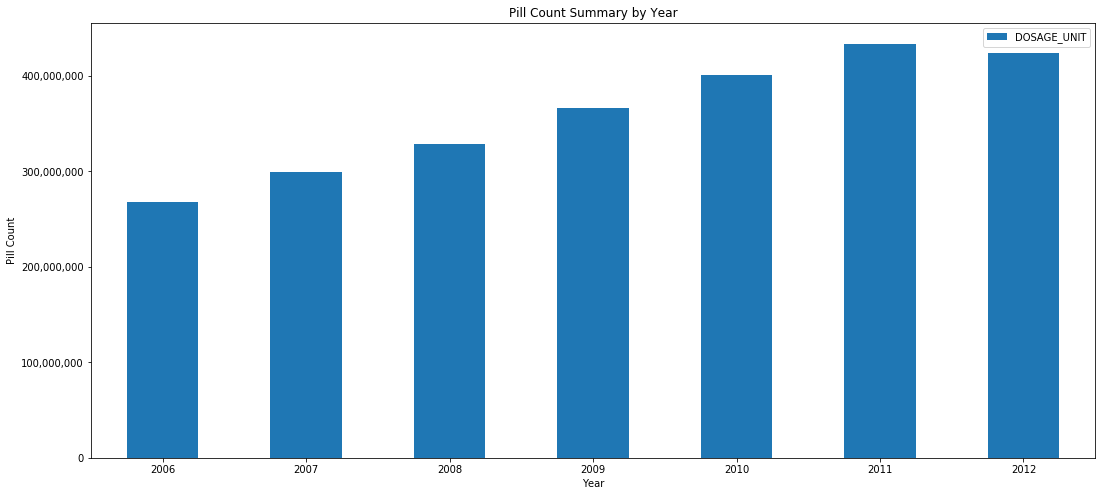

In [21]:
# Plot the trend by year
ax = pills_by_year.plot.bar(title="Pill Count Summary by Year", rot=0)
ax.set_xlabel("Year")
ax.set_ylabel("Pill Count")
vals = ax.get_yticks().astype(int)
ax.set_yticklabels(['{:,}'.format(x) for x in vals])

Let's summarize the dataset by month to see how the number of opioids were distributed to Tennessee over time.

In [22]:
pills_by_month = data[['TRANSACTION_DATE', 'DOSAGE_UNIT']].groupby(data.TRANSACTION_DATE.dt.month).sum()
pills_by_month['Month'] = pills_by_month.index
pills_by_month.index = pills_by_month['Month'].apply(lambda x: calendar.month_abbr[x])
pills_by_month = pills_by_month[['DOSAGE_UNIT']]
pills_by_month

,DOSAGE_UNIT
Month,
Jan,1.915765e+08
Feb,1.873105e+08
Mar,2.087190e+08
Apr,2.076771e+08
May,2.136185e+08
Jun,2.162458e+08
Jul,2.154702e+08
Aug,2.170487e+08
Sep,2.080198e+08


[Text(0, 0, '0'),
 Text(0, 0, '50,000,000'),
 Text(0, 0, '100,000,000'),
 Text(0, 0, '150,000,000'),
 Text(0, 0, '200,000,000'),
 Text(0, 0, '250,000,000')]

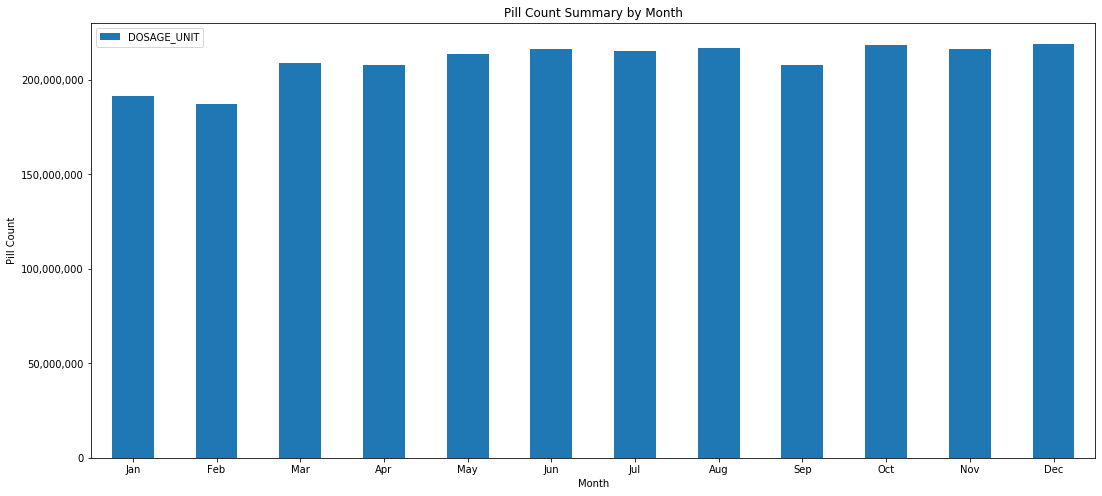

In [23]:
# Plot the trend by month
ax = pills_by_month.plot.bar(title="Pill Count Summary by Month", rot=0)
ax.set_xlabel("Month")
ax.set_ylabel("Pill Count")
vals = ax.get_yticks().astype(int)
ax.set_yticklabels(['{:,}'.format(x) for x in vals])

Let's summarize the dataset by day to see how the number of opioids were distributed to Tennessee over time.

[Text(0, 0, '40,000,000'),
 Text(0, 0, '50,000,000'),
 Text(0, 0, '60,000,000'),
 Text(0, 0, '70,000,000'),
 Text(0, 0, '80,000,000'),
 Text(0, 0, '90,000,000'),
 Text(0, 0, '100,000,000')]

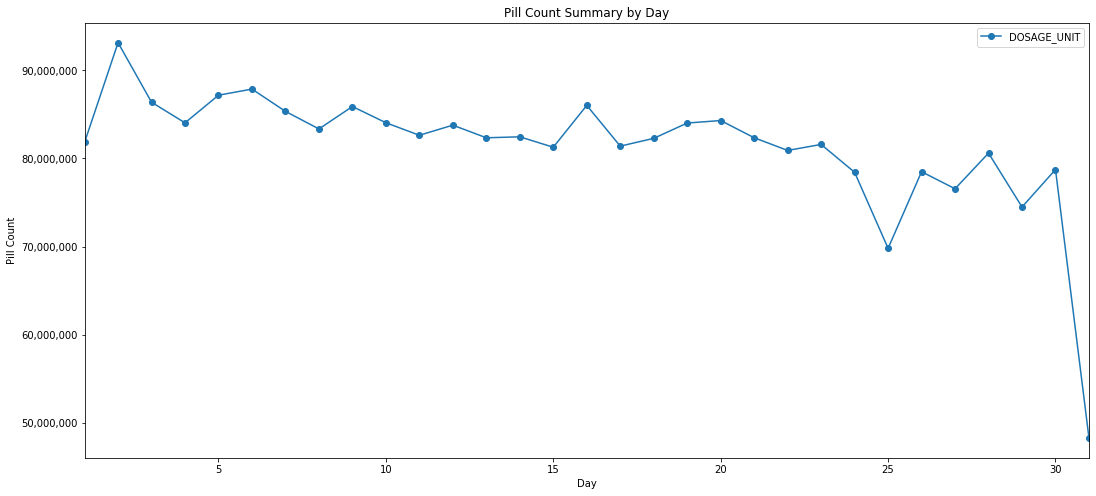

In [24]:
pills_by_day = data[['TRANSACTION_DATE', 'DOSAGE_UNIT']].groupby(data.TRANSACTION_DATE.dt.day).sum()
pills_by_day
# Plot the trend by day
ax = pills_by_day.plot(title="Pill Count Summary by Day", rot=0, style='-', marker='o')
ax.set_xlabel("Day")
ax.set_ylabel("Pill Count")
vals = ax.get_yticks().astype(int)
ax.set_yticklabels(['{:,}'.format(x) for x in vals])

Let's summarize the dataset by day of week to see how the number of opioids were distributed to Tennessee over time.

In [25]:
pills_by_dayofweek = data[['TRANSACTION_DATE', 'DOSAGE_UNIT']].groupby(data.TRANSACTION_DATE.dt.dayofweek).sum()
pills_by_dayofweek['DayofWeek'] = pills_by_dayofweek.index
pills_by_dayofweek.index = pills_by_dayofweek['DayofWeek'].apply(lambda x: calendar.day_abbr[x])
pills_by_dayofweek = pills_by_dayofweek[['DOSAGE_UNIT']]
pills_by_dayofweek

,DOSAGE_UNIT
DayofWeek,
Mon,4.754779e+08
Tue,4.987488e+08
Wed,4.591238e+08
Thu,5.431192e+08
Fri,4.410413e+08
Sat,2.803524e+07
Sun,7.423334e+07


[Text(0, 0, '0'),
 Text(0, 0, '100,000,000'),
 Text(0, 0, '200,000,000'),
 Text(0, 0, '300,000,000'),
 Text(0, 0, '400,000,000'),
 Text(0, 0, '500,000,000'),
 Text(0, 0, '600,000,000')]

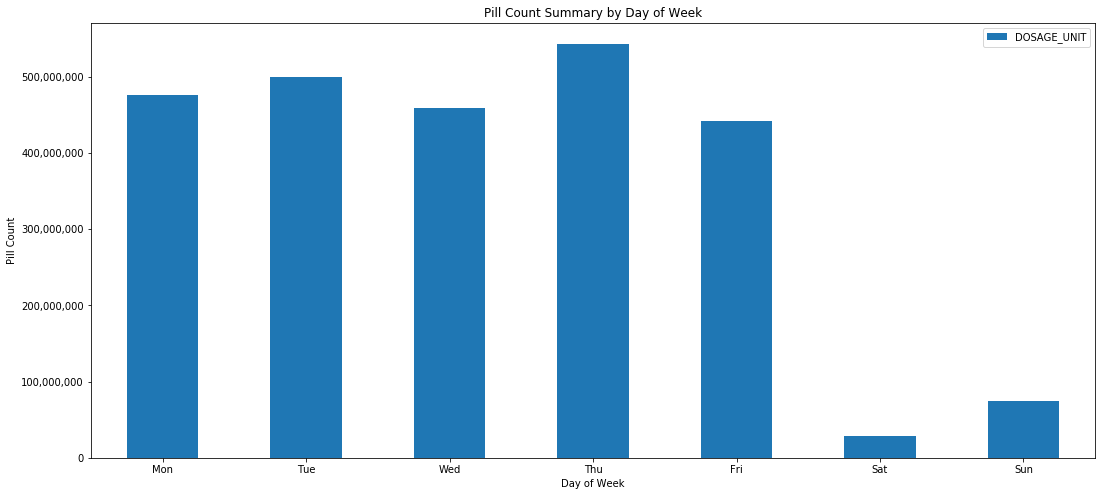

In [26]:
ax = pills_by_dayofweek.plot.bar(title="Pill Count Summary by Day of Week", rot=0)
ax.set_xlabel("Day of Week")
ax.set_ylabel("Pill Count")
vals = ax.get_yticks().astype(int)
ax.set_yticklabels(['{:,}'.format(x) for x in vals])

Let's look at the total pills per month by year:

[Text(0, 0, '15,000,000'),
 Text(0, 0, '17,500,000'),
 Text(0, 0, '20,000,000'),
 Text(0, 0, '22,500,000'),
 Text(0, 0, '25,000,000'),
 Text(0, 0, '27,500,000'),
 Text(0, 0, '30,000,000'),
 Text(0, 0, '32,500,000'),
 Text(0, 0, '35,000,000'),
 Text(0, 0, '37,500,000'),
 Text(0, 0, '40,000,000')]

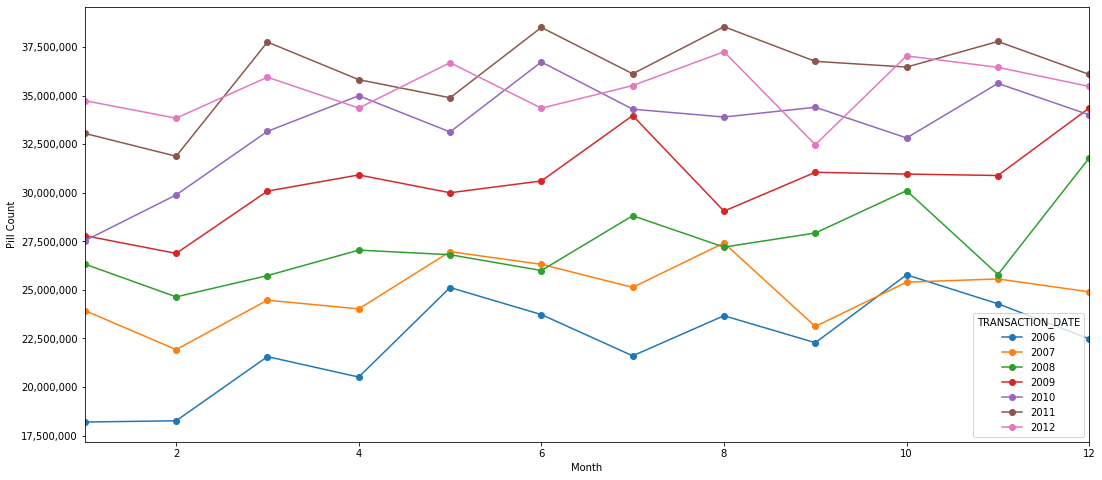

In [27]:
pills_by_year_month = data[['TRANSACTION_DATE', 'DOSAGE_UNIT']].groupby([data.TRANSACTION_DATE.dt.month, 
                                                                        data.TRANSACTION_DATE.dt.year]).sum()
# pills_by_year_month.index
# pills_by_month['Month'] = pills_by_month.index
# pills_by_month.index = pills_by_month['Month'].apply(lambda x: calendar.month_abbr[x])
# pills_by_month = pills_by_month[['DOSAGE_UNIT']]
ax = pills_by_year_month['DOSAGE_UNIT'].unstack().plot(style='-', marker='o')
ax.set_xlabel("Month")
ax.set_ylabel("Pill Count")
vals = ax.get_yticks().astype(int)
ax.set_yticklabels(['{:,}'.format(x) for x in vals])

### Top 10 Distributors, Manufacturers, and Buyers<a class="anchor" id="top-10"></a>

Let's take a look at the top 10 distributors:

In [28]:
distributors = data[['REPORTER_NAME', 'DOSAGE_UNIT']].groupby('REPORTER_NAME').sum()
distributors_top10 = distributors.sort_values('DOSAGE_UNIT', ascending=False).head(10)
distributors_top10

,DOSAGE_UNIT
REPORTER_NAME,
AMERISOURCEBERGEN DRUG CORP,422382170.0
WALGREEN CO,398849480.0
CARDINAL HEALTH,346617844.0
MCKESSON CORPORATION,250733060.0
SMITH DRUG COMPANY,182987750.0
"CVS TN DISTRIBUTION, LLC",141681000.0
WAL-MART PHARM WAREHOUSE #1,107693400.0
WALGREEN CO.,105143560.0
KROGER LIMITED PARTNERSHIP I,93372360.0


The table above shows that the 2nd distributor (**WALGREEN CO**) and 8th distributor (**WALGREEN CO.**) are treated as different distirbutors. We need to remove the extra period from the 8th distributor. 

In [29]:
data['REPORTER_NAME'] = data['REPORTER_NAME'].str.replace('.', '', regex=False)
distributors = data[['REPORTER_NAME', 'DOSAGE_UNIT']].groupby('REPORTER_NAME').sum()
distributors_top10 = distributors.sort_values('DOSAGE_UNIT', ascending=False).head(10)
distributors_top10

,DOSAGE_UNIT
REPORTER_NAME,
WALGREEN CO,503993040.0
AMERISOURCEBERGEN DRUG CORP,422382170.0
CARDINAL HEALTH,346617844.0
MCKESSON CORPORATION,250733060.0
SMITH DRUG COMPANY,182987750.0
"CVS TN DISTRIBUTION, LLC",141681000.0
WAL-MART PHARM WAREHOUSE #1,107693400.0
KROGER LIMITED PARTNERSHIP I,93372360.0
MORRIS & DICKSON CO,52357760.0


[Text(0, 0, '0'),
 Text(0, 0, '100,000,000'),
 Text(0, 0, '200,000,000'),
 Text(0, 0, '300,000,000'),
 Text(0, 0, '400,000,000'),
 Text(0, 0, '500,000,000'),
 Text(0, 0, '600,000,000')]

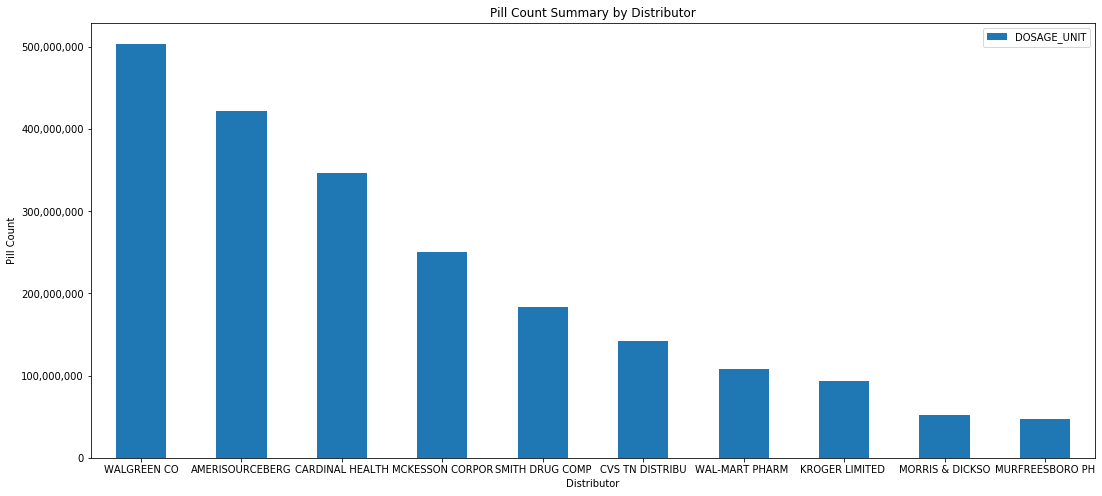

In [30]:
distributors_top10.index = distributors_top10.index.str[:15]
ax = distributors_top10.plot.bar(title="Pill Count Summary by Distributor", rot=0)
ax.set_xlabel("Distributor")
ax.set_ylabel("Pill Count")
vals = ax.get_yticks().astype(int)
ax.set_yticklabels(['{:,}'.format(x) for x in vals])

Let's take a look at the top 10 manufacturers:

In [31]:
manufacturers = data[['Combined_Labeler_Name', 'DOSAGE_UNIT']].groupby('Combined_Labeler_Name').sum()
manufacturers_top10 = manufacturers.sort_values('DOSAGE_UNIT', ascending=False).head(10)
manufacturers_top10

,DOSAGE_UNIT
Combined_Labeler_Name,
"Actavis Pharma, Inc.",1.113634e+09
SpecGx LLC,6.530802e+08
Par Pharmaceutical,4.796291e+08
Purdue Pharma LP,7.493952e+07
Amneal Pharmaceuticals LLC,6.000654e+07
"KVK-Tech, Inc.",1.406460e+07
"Teva Pharmaceuticals USA, Inc.",1.327000e+07
"UCB, Inc.",9.361457e+06
Ethex Corporation,7.713100e+06


[Text(0, 0, '0'),
 Text(0, 0, '200,000,000'),
 Text(0, 0, '400,000,000'),
 Text(0, 0, '600,000,000'),
 Text(0, 0, '800,000,000'),
 Text(0, 0, '1,000,000,000'),
 Text(0, 0, '1,200,000,000')]

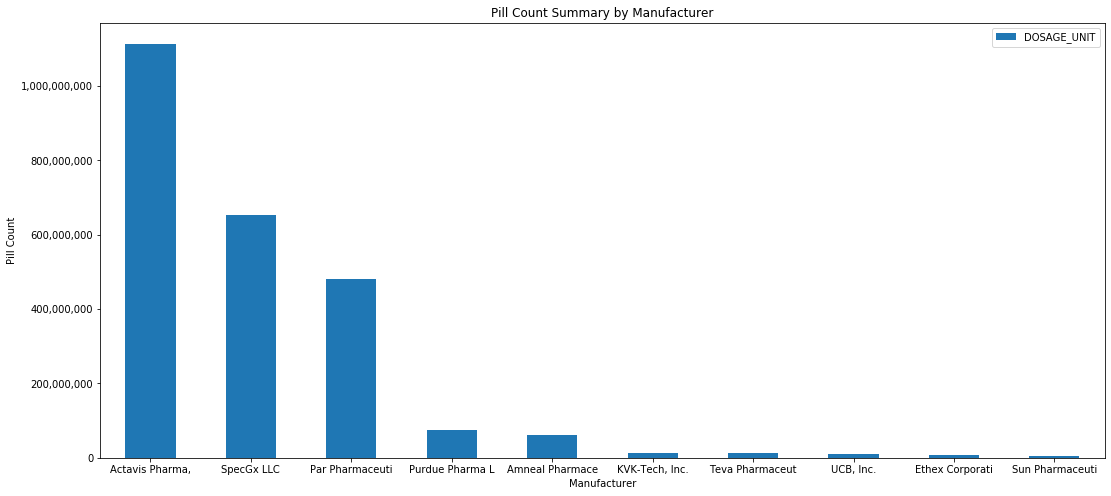

In [32]:
manufacturers_top10.index = manufacturers_top10.index.str[:15]
ax = manufacturers_top10.plot.bar(title="Pill Count Summary by Manufacturer", rot=0)
ax.set_xlabel("Manufacturer")
ax.set_ylabel("Pill Count")
vals = ax.get_yticks().astype(int)
ax.set_yticklabels(['{:,}'.format(x) for x in vals])

Let's take a look at the top 10 buyers:

In [33]:
buyers = data[['BUYER_NAME', 'DOSAGE_UNIT']].groupby('BUYER_NAME').sum()
buyers_top10 = buyers.sort_values('DOSAGE_UNIT', ascending=False).head(10)
buyers_top10

,DOSAGE_UNIT
BUYER_NAME,
WALGREEN CO.,513226530.0
"TENNESSEE CVS PHARMACY, L.L.C.",215691864.0
ECKERD CORPORATION,51414225.0
REEVES-SAIN EXTENDED CARE,45925980.0
"RITE AID OF TENNESSEE, INC.",39738680.0
FRED'S PHARMACY,29194750.0
FOOD CITY PHARMACY #674,21555400.0
PHARMERICA,13256670.0
P & S PHARMACY,12662200.0


[Text(0, 0, '0'),
 Text(0, 0, '100,000,000'),
 Text(0, 0, '200,000,000'),
 Text(0, 0, '300,000,000'),
 Text(0, 0, '400,000,000'),
 Text(0, 0, '500,000,000'),
 Text(0, 0, '600,000,000')]

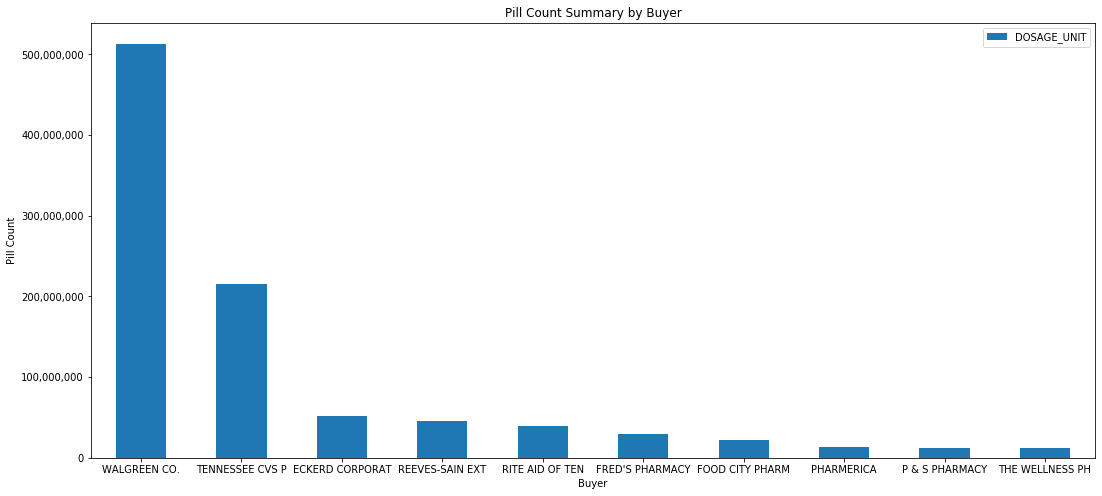

In [34]:
buyers_top10.index = buyers_top10.index.str[:15]
ax = buyers_top10.plot.bar(title="Pill Count Summary by Buyer", rot=0)
ax.set_xlabel("Buyer")
ax.set_ylabel("Pill Count")
vals = ax.get_yticks().astype(int)
ax.set_yticklabels(['{:,}'.format(x) for x in vals])

In [35]:
counties = data[['BUYER_COUNTY', 'DOSAGE_UNIT']].groupby('BUYER_COUNTY').sum()
counties_top10 = counties.sort_values('DOSAGE_UNIT', ascending=False).head(10)
counties_top10

,DOSAGE_UNIT
BUYER_COUNTY,
KNOX,2.126212e+08
DAVIDSON,2.108839e+08
SHELBY,1.574319e+08
HAMILTON,1.419497e+08
RUTHERFORD,1.177333e+08
SULLIVAN,1.080344e+08
HAMBLEN,5.985344e+07
WASHINGTON,5.919680e+07
BRADLEY,5.408902e+07


[Text(0, 0, '0'),
 Text(0, 0, '25,000,000'),
 Text(0, 0, '50,000,000'),
 Text(0, 0, '75,000,000'),
 Text(0, 0, '100,000,000'),
 Text(0, 0, '125,000,000'),
 Text(0, 0, '150,000,000'),
 Text(0, 0, '175,000,000'),
 Text(0, 0, '200,000,000'),
 Text(0, 0, '225,000,000')]

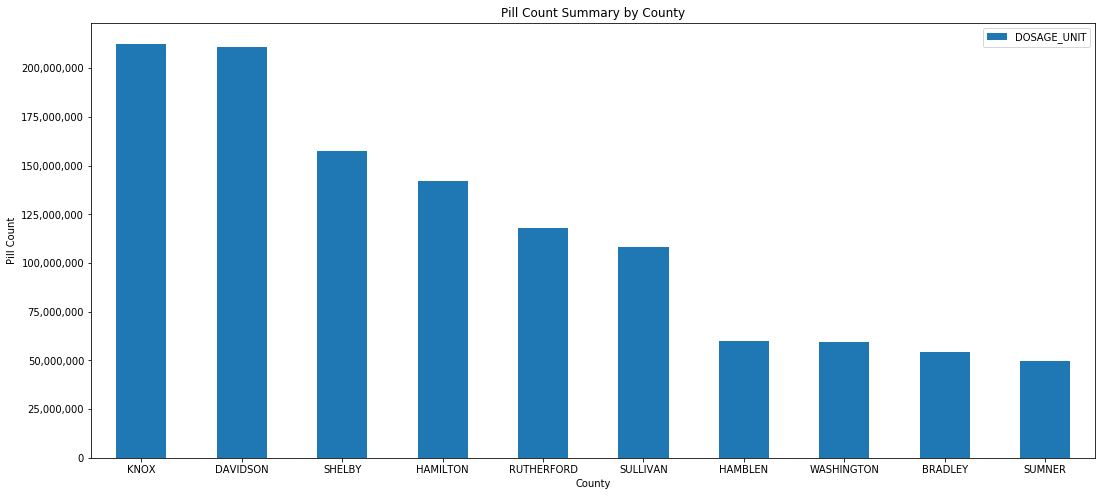

In [36]:
ax = counties_top10.plot.bar(title="Pill Count Summary by County", rot=0)
ax.set_xlabel("County")
ax.set_ylabel("Pill Count")
vals = ax.get_yticks().astype(int)
ax.set_yticklabels(['{:,}'.format(x) for x in vals])

In [37]:
cities = data[['BUYER_CITY', 'DOSAGE_UNIT']].groupby('BUYER_CITY').sum()
cities_top10 = cities.sort_values('DOSAGE_UNIT', ascending=False).head(10)
cities_top10

,DOSAGE_UNIT
BUYER_CITY,
KNOXVILLE,1.783076e+08
NASHVILLE,1.349968e+08
MEMPHIS,1.007746e+08
MURFREESBORO,8.780814e+07
CHATTANOOGA,8.401485e+07
KINGSPORT,7.619618e+07
MORRISTOWN,5.984324e+07
CLEVELAND,5.074759e+07
JOHNSON CITY,4.428983e+07


[Text(0, 0, '0'),
 Text(0, 0, '25,000,000'),
 Text(0, 0, '50,000,000'),
 Text(0, 0, '75,000,000'),
 Text(0, 0, '100,000,000'),
 Text(0, 0, '125,000,000'),
 Text(0, 0, '150,000,000'),
 Text(0, 0, '175,000,000'),
 Text(0, 0, '200,000,000')]

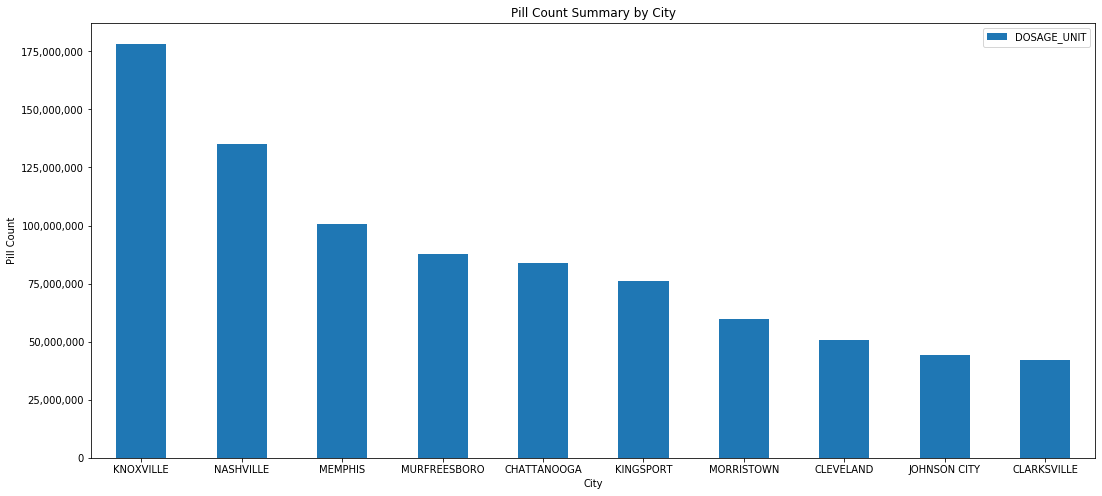

In [38]:
ax = cities_top10.plot.bar(title="Pill Count Summary by City", rot=0)
ax.set_xlabel("City")
ax.set_ylabel("Pill Count")
vals = ax.get_yticks().astype(int)
ax.set_yticklabels(['{:,}'.format(x) for x in vals])